# Trying KNN for it 

In [90]:
import pandas as pd
import numpy as np
delete_index = [19730,29503,35587]

In [4]:
from sklearn.cluster import KMeans

In [5]:
pd.set_option('display.max_rows',500)
ratings = pd.read_csv("data/ratings_small.csv")

ratings

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
...,...,...,...,...
99999,671,6268,2.5,1065579370
100000,671,6269,4.0,1065149201
100001,671,6365,4.0,1070940363
100002,671,6385,2.5,1070979663


In [6]:
data = pd.read_csv("data/movies_metadata.csv")

C:\Users\gandl\AppData\Local\Temp\ipykernel_8292\2292929381.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("data/movies_metadata.csv")


In [10]:
import ast

In [14]:
def str_to_dict_array(string):
    genres_array = []
    dic = ast.literal_eval(string)
    for i in dic:
        genres_array.append(i["name"])
    return genres_array


In [36]:
genre_df = pd.DataFrame()

In [38]:
genre_df["id"] = data["id"]
genre_df

,id
0,862
1,8844
2,15602
3,31357
4,11862
...,...
45461,439050
45462,111109
45463,67758
45464,227506


In [40]:
genre_df["genres"] = data["genres"].apply(func=str_to_dict_array)
genre_df.rename({"id" : "movieId"},inplace=True,axis=1)
genre_df

,movieId,genres
0,862,"[Animation, Comedy, Family]"
1,8844,"[Adventure, Fantasy, Family]"
2,15602,"[Romance, Comedy]"
3,31357,"[Comedy, Drama, Romance]"
4,11862,[Comedy]
...,...,...
45461,439050,"[Drama, Family]"
45462,111109,[Drama]
45463,67758,"[Action, Drama, Thriller]"
45464,227506,[]


In [42]:
user_x_genres = pd.DataFrame()
user_x_genres["userId"] = ratings["userId"].unique()
user_x_genres

,userId
0,1
1,2
2,3
3,4
4,5
...,...
666,667
667,668
668,669
669,670


In [26]:
user_x_genres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671 entries, 0 to 670
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   userId  671 non-null    int64
dtypes: int64(1)
memory usage: 5.4 KB


In [140]:
def genres_array_creation(series):
    movie_ids = ratings[ratings["userId"] == series]["movieId"]
    genre_array = genre_df[genre_df["movieId"].isin(movie_ids)]["genres"]
    new_df[new_df["movieId"].isin(movie_ids)]["genres"].values.tolist()
    genre_set = set()
    # Iterate through the array and update the set
    for genre_list in genre_array:
        genre_set.update(genre_list)
    return list(genre_set)
genres_array_creation(1)


['Crime', 'Romance', 'Drama', 'Comedy', 'History']

In [94]:
# genre_df[genre_df["movieId"] == '2014-01-01'].index
# genre_df.drop(index = 35587,inplace=True,axis=0) 
#delete_index = [19730,29503,35587]

In [126]:
genre_df["movieId"] = genre_df["movieId"].astype(int)

In [122]:
type(genre_df[genre_df.index == 0]["movieId"].values[0])

str

In [110]:
genre_df

,movieId,genres
0,862,"[Animation, Comedy, Family]"
1,8844,"[Adventure, Fantasy, Family]"
2,15602,"[Romance, Comedy]"
3,31357,"[Comedy, Drama, Romance]"
4,11862,[Comedy]
...,...,...
45461,439050,"[Drama, Family]"
45462,111109,[Drama]
45463,67758,"[Action, Drama, Thriller]"
45464,227506,[]


In [143]:
user_x_genres["genres"] = user_x_genres["userId"].apply(func=genres_array_creation)
user_x_genres

,userId,genres
0,1,"[Crime, Romance, Drama, Comedy, History]"
1,2,"[Mystery, Thriller, Crime, Action, Documentary..."
2,3,"[Mystery, Crime, Thriller, Action, Romance, Ad..."
3,4,"[Mystery, Thriller, Crime, Action, Documentary..."
4,5,"[Mystery, Crime, Thriller, Action, Documentary..."
...,...,...
666,667,"[Mystery, Crime, Thriller, Action, Documentary..."
667,668,"[Mystery, Thriller, Crime, Action, Documentary..."
668,669,"[Mystery, Thriller, Crime, Action, Romance, Ad..."
669,670,"[Mystery, Thriller, Crime, Action, Romance, Ad..."


In [145]:
df = user_x_genres.explode(column="genres")

In [147]:
user_genres_data = df.pivot_table(index = "userId",columns="genres",aggfunc="size",fill_value=0)

In [149]:
user_genres_data.to_csv("user_genres_data.csv")

In [151]:
user_genres_data

genres,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
userId,,,,,,,,,,,,,,,,,,,,
1,0,0,0,1,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
2,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,0,1,1,0
3,1,1,0,1,1,0,1,1,1,1,0,1,0,1,1,1,1,1,1,0
4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0
5,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,1,1,0,1,1,1,1,1,1,0,1,1,1,1,1,1,0,1,1,0
668,1,1,0,1,1,1,1,0,0,0,0,0,0,1,0,1,0,1,0,0
669,1,1,0,1,1,0,1,1,1,0,0,1,1,1,1,1,0,1,0,0


In [157]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np



# Create DataFrame
df = user_genres_data

# Define the number of clusters
k = 3

# Apply K-means
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(df)

# Get cluster assignments
df['Cluster'] = kmeans.labels_

# Print clusters
print(df)

# Silhouette Score to evaluate
score = silhouette_score(df.drop('Cluster', axis=1), kmeans.labels_)
print('Silhouette Score:', score)

# To assign a new user to a cluster
new_user = np.array([[1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0]])
new_user_cluster = kmeans.predict(new_user)
print('New user belongs to cluster:', new_user_cluster)




genres  Action  Adventure  Animation  Comedy  Crime  Documentary  Drama  \
userId                                                                    
1            0          0          0       1      1            0      1   
2            1          1          1       1      1            1      1   
3            1          1          0       1      1            0      1   
4            1          1          1       1      1            1      1   
5            1          1          1       1      1            1      1   
...        ...        ...        ...     ...    ...          ...    ...   
667          1          1          0       1      1            1      1   
668          1          1          0       1      1            1      1   
669          1          1          0       1      1            0      1   
670          1          1          0       1      1            0      1   
671          1          1          1       1      1            1      1   

genres  Family  Fantasy 

C:\Users\gandl\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\gandl\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [189]:
import matplotlib.pyplot as plt
n_clus = [5,10,20,30,50,70,100,120,150,170,200,225,250,275,300,325,350,355,400]

In [191]:
wcss = []
for i in n_clus:
    model = KMeans(n_clusters=i,random_state=42)
    model.fit(user_genres_data)
    wcss.append(model.inertia_)
    

C:\Users\gandl\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\gandl\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\gandl\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\gandl\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

In [ ]:
import matplotlib.pyplot as plt
n_clus = [5,10,20,30,50,70,100,120,150,170,200,225,250,275,300]

In [193]:
wcss

[1017.4790516890515,
 871.2942909190242,
 692.1051822430923,
 600.3846657000795,
 459.3133767416487,
 365.60253907038805,
 271.3108362226009,
 223.53669172927042,
 163.40642477400343,
 132.79892540542696,
 87.99758566474985,
 58.507431457431466,
 38.959090909090904,
 21.800793650793654,
 5.383333333333335,
 8.219970113966803e-29,
 1.0896170623796877e-27,
 1.825710616760649e-27,
 130.0]

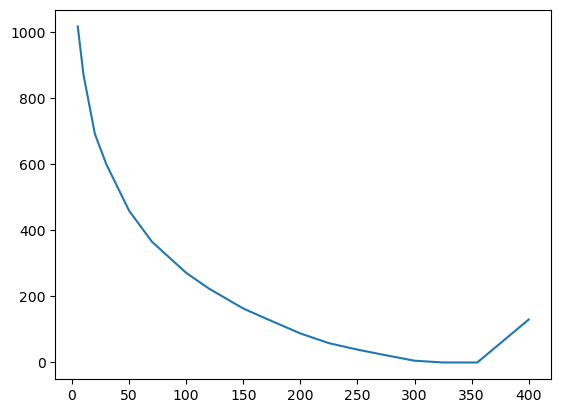

In [195]:
plt.plot(n_clus,wcss)

In [201]:
model1 = KMeans(n_clusters=200,random_state=42)
model1.fit(user_genres_data)
pred = model1.predict(user_genres_data)

C:\Users\gandl\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [199]:
silhouette_score(user_genres_data,model1.labels_)

0.5899301569131565

In [203]:
user_genres_data["clusters"]  = pred

In [207]:
user_genres_data.drop(columns="Cluster",axis = 1, inplace=True)
user_genres_data

genres,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,...,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,clusters
userId,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,1,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,184
2,1,1,1,1,1,1,1,1,1,0,...,1,1,1,1,1,0,1,1,0,0
3,1,1,0,1,1,0,1,1,1,1,...,1,0,1,1,1,1,1,1,0,66
4,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0,1,1,0,40
5,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0,1,0,1,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,1,1,0,1,1,1,1,1,1,0,...,1,1,1,1,1,0,1,1,0,34
668,1,1,0,1,1,1,1,0,0,0,...,0,0,1,0,1,0,1,0,0,154
669,1,1,0,1,1,0,1,1,1,0,...,1,1,1,1,1,0,1,0,0,23


# Saving the model

In [210]:
import pickle


In [212]:
import pickle

# save the iris classification model as a pickle file
model_pkl_file = "knn_model.pkl"  

with open(model_pkl_file, 'wb') as file:  
    pickle.dump(model1, file)

# Loading File:

In [218]:
with open(model_pkl_file, 'rb') as file:  
    model12 = pickle.load(file)